In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [10]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [15]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\DELL\anaconda3\envs\pytorch_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [19]:
History=model.fit(X_train_scaled,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4998 - loss: 0.7281 - val_accuracy: 0.8050 - val_loss: 0.4752
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 0.4662 - val_accuracy: 0.8169 - val_loss: 0.4269
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8262 - loss: 0.4157 - val_accuracy: 0.8281 - val_loss: 0.4080
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8318 - loss: 0.4069 - val_accuracy: 0.8363 - val_loss: 0.3873
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8408 - loss: 0.3826 - val_accuracy: 0.8406 - val_loss: 0.3729
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8515 - loss: 0.3636 - val_accuracy: 0.8481 - val_loss: 0.3659
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3551 - val_accuracy: 0.8462 - val_loss: 0.3620
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8650 - loss: 0.3382 - val_accuracy: 0.

In [20]:
model.layers[1].get_weights()

[array([[-0.06714806, -0.01545253,  0.03679878, -0.13970205, -0.33515975,
         -0.00287306, -0.3187403 ,  0.40318882, -0.05687978,  0.14864394,
         -0.5068568 , -0.03629745,  0.26747572,  0.1587164 ,  0.57475454,
         -0.18492909,  0.11431339, -0.14749974,  0.30296853, -0.16192903,
         -0.12748079, -0.14679734, -0.37140715,  0.32287237,  0.26319656,
          0.23086634, -0.37166357, -0.10979594],
        [ 0.4817997 ,  0.46900442,  0.05243045, -0.06891424, -0.08200565,
         -0.1286337 ,  0.05109734,  0.2015961 ,  0.31535348,  0.42604876,
         -0.35753083,  0.4243318 ,  0.17901936, -0.5103874 ,  0.48701847,
          0.36468616, -0.10555451,  0.25353542,  0.07138345,  0.44518173,
          0.22097732,  0.12056617, -0.19027941, -0.06952119, -0.07918993,
          0.29489756,  0.14678155,  0.05801268],
        [-0.04078371,  0.4326051 ,  0.29961294,  0.30730733, -0.19824333,
          0.19806653,  0.08510004, -0.36455733,  0.40243775,  0.46912503,
          0.31

In [21]:
model.layers[2].get_weights()

[array([[-0.9982306 ],
        [-0.1201243 ],
        [ 0.9802896 ],
        [ 0.5501023 ],
        [-0.61988455],
        [-0.27851927],
        [-1.2866118 ],
        [ 1.0350436 ],
        [-0.15621555],
        [-0.28539264],
        [ 0.3805032 ],
        [-0.3141138 ],
        [ 0.12413958],
        [ 0.45059893],
        [ 0.83298934],
        [-0.69597983],
        [-0.09882197],
        [ 0.01670359],
        [ 0.5662198 ],
        [ 0.5149453 ],
        [-0.3395251 ],
        [-0.04894893],
        [ 0.50056136],
        [ 0.95432466],
        [ 0.5257443 ],
        [ 0.5239349 ],
        [-0.19340608],
        [-0.23596029]], dtype=float32),
 array([-0.13579832], dtype=float32)]

In [22]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [23]:
y_pred=np.where(y_log>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

In [25]:
History.history

{'accuracy': [0.682812511920929,
  0.8148437738418579,
  0.8260937333106995,
  0.8374999761581421,
  0.8457812666893005,
  0.8493750095367432,
  0.8526562452316284,
  0.8564062714576721,
  0.8543750047683716,
  0.8553125262260437,
  0.8564062714576721,
  0.859375,
  0.8576562404632568,
  0.8567187786102295,
  0.8584374785423279,
  0.8596875071525574,
  0.860156238079071,
  0.860156238079071,
  0.8617187738418579,
  0.8629687428474426,
  0.8631250262260437,
  0.8612499833106995,
  0.8634374737739563,
  0.8631250262260437,
  0.8621875047683716,
  0.8628125190734863,
  0.8643749952316284,
  0.864062488079071,
  0.8660937547683716,
  0.8654687404632568,
  0.8653125166893005,
  0.8645312786102295,
  0.8660937547683716,
  0.8645312786102295,
  0.8643749952316284,
  0.8637499809265137,
  0.8631250262260437,
  0.8645312786102295,
  0.8660937547683716,
  0.86328125,
  0.8639062643051147,
  0.8662499785423279,
  0.8654687404632568,
  0.8667187690734863,
  0.8643749952316284,
  0.8635937571525574

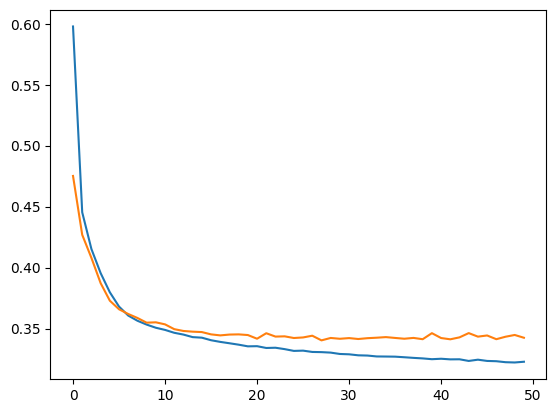

In [26]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.show()

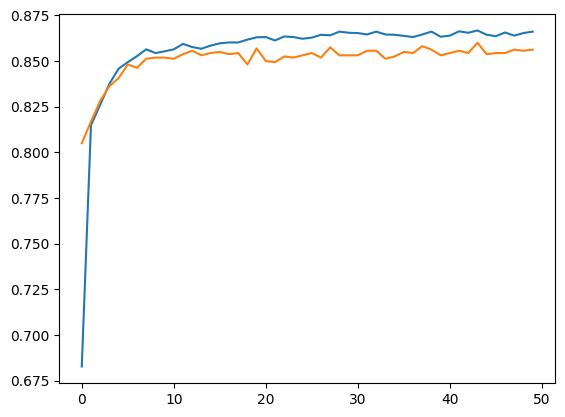

In [27]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.show()